# Data Science And Business Analytics Internship

# The Sparks Foundation Task 1

### Predict the percentage of an student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/ day? 

# Author: Priyam Bhalla

# Prediction using Supervised Machine Learning

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported")

Libraries imported


### Importing the Data

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported")

Data imported


### Displaying the Data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Analysing the Data

In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization

<AxesSubplot:>

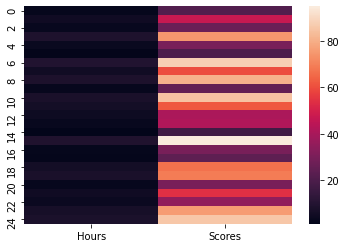

In [7]:
sns.heatmap(data=df)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

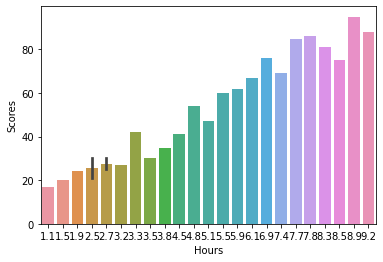

In [8]:
sns.barplot(x=df.Hours,y=df.Scores)

Text(0, 0.5, 'Percentage Scores')

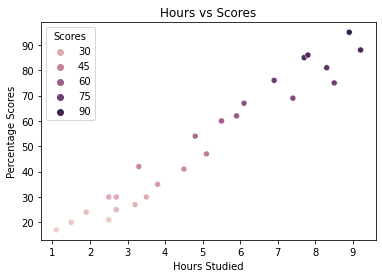

In [9]:
sns.scatterplot(x="Hours",y="Scores",data=df,hue="Scores")
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")

### From the above graph we can clearly see that when the hours of study is less then the percentage score is also less. Therefore it follows a positive linear relationship

### Preparing the Data

Here the data is to be divided into attributes and labels.
Attributes is the input variable which here is Hours.
Labels is the output variable which here is Scores.

In [10]:
X=df.iloc[:,:1]

In [11]:
y=df.iloc[:,1:]

### Spliting into test train split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

### Applying Models

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

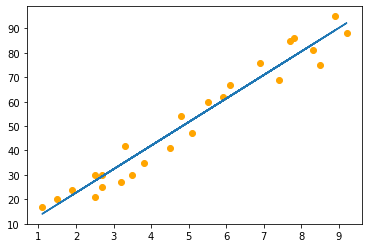

In [40]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'orange')
plt.plot(X, line);
plt.show()

### Predictions

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
y_pred

array([[83.50244409],
       [27.53075726],
       [27.53075726],
       [69.99203692],
       [60.34174609],
       [29.46081542],
       [35.25098992],
       [52.62151342],
       [40.07613534]])

In [18]:
hours = 9.25
own_pred = regressor.predict([[hours]])

In [19]:
own_pred

array([[92.67022038]])

In [20]:
from sklearn import metrics 
metrics.mean_absolute_error(y_test, y_pred)

4.564015037730867

In [21]:
metrics.r2_score(y_test, y_pred)

0.9435488190277577

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lregressor=LogisticRegression()
lregressor.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1=lregressor.predict(X_test)

In [24]:
y_pred1

array([88, 30, 30, 69, 67, 30, 30, 30, 30], dtype=int64)

In [25]:
metrics.mean_absolute_error(y_test, y_pred1)

7.444444444444445

In [26]:
own_pred1=lregressor.predict([[9.25]])
own_pred1

array([88], dtype=int64)

In [27]:
metrics.r2_score(y_test, y_pred1)

0.8210108846688282

### Lasso Regression

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
Lasregressor=LassoCV()
Lasregressor.fit(X_train,y_train)

LassoCV()

In [30]:
y_pred2=Lasregressor.predict(X_test)

In [31]:
y_pred2

array([83.08779825, 27.90949562, 27.90949562, 69.76889761, 60.25539716,
       29.81219571, 35.52029598, 52.6445968 , 40.27704621])

In [32]:
metrics.mean_absolute_error(y_test, y_pred2)

4.586338467669724

In [33]:
own_pred2=Lasregressor.predict([[9.25]])
own_pred2

array([92.12562368])

In [34]:
metrics.r2_score(y_test, y_pred2)

0.9418499022954744

### Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
Rregressor=Ridge()
Rregressor.fit(X_train,y_train)

Ridge()

In [36]:
y_pred3=Rregressor.predict(X_test)
y_pred3

array([[83.24903219],
       [27.76222421],
       [27.76222421],
       [69.85566474],
       [60.28897371],
       [29.67556241],
       [35.41557703],
       [52.63562089],
       [40.19892255]])

In [37]:
metrics.mean_absolute_error(y_test,y_pred3)

4.577658060887168

In [38]:
own_pred3=Rregressor.predict([[hours]])
own_pred3

array([[92.33738867]])

In [39]:
metrics.r2_score(y_test, y_pred3)

0.9425571411471005

### Comparing all the models linear Regression Model shows the Minimum Mean Absolute Error and highest r2 score.Therefore Linear Regression is the best model for this problem.

### Therefore the score of the student that studies 9.25hrs/day is predicted as 92.67%